In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

Original Course by: [Matthew R. Carbone](https://matthewcarbone.dev/) 

Revisions by: Maggie Voetberg | _AI Researcher, Fermi National Accelelator Laboratory_

# Regression and Classification

In this tutorial, we're going to go over the fundamentals of regression and classification, which are the two most common types of supervised learning. We will also discuss some of the best practices in machine learning, such as a train-validation-testing split. In regression problems, the objective is to learn a _continuous_ output. In classification problems, the objective is to learn a _discrete_ output. Here are some examples:
- Predicting the cost of a house from its properties, such as square footage, number of bathrooms, etc. is a _regression_ problem.
- Whether or not an image is of a cat or dog is a _classification_ problem.
- Predicting the type of animal in an image is a _classification_ problem.

## Outline 

In this course we'll go through the following exercises

- Write an algorithm for finding the lowest point of 1D slope
- Rewrite this algorithm for higher dimensions
- Write a function describing how close a function we have matches data
- Learn about 2 common models used to fit data

## Other Resources

- [Andrew Ng's flagship Coursera course on machine learning](https://www.coursera.org/specializations/machine-learning-introduction)
- [Intro to regression analysis](https://towardsdatascience.com/introduction-to-regression-analysis-9151d8ac14b3)
- [15 types of regression](https://www.listendata.com/2018/03/regression-analysis.html#Linear-Regression)
- [Gradient descent tutorial](https://machinelearningmind.com/2019/10/06/gradient-descent-introduction-and-implementation-in-python/)
- [Linear regression gradient descent tutorial](https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931)
- [Logistic regression tutorial](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
- [Another logistic regression tutorial](https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial)
- [Decision Tree Overview](https://www.mastersindatascience.org/learning/machine-learning-algorithms/decision-tree/)
- [Google's excellent Decision Forest Developers](https://developers.google.com/machine-learning/decision-forests/decision-trees)

In [2]:
# Rolling down a slope

def rolling_down_slope(x:float|int|np.ndarray):
    """
    Position of a ball rolling down a slope at time x, with added linear noise
    x can either be a single point or a collection of points
    """
    y = (x-6)**2
    return y


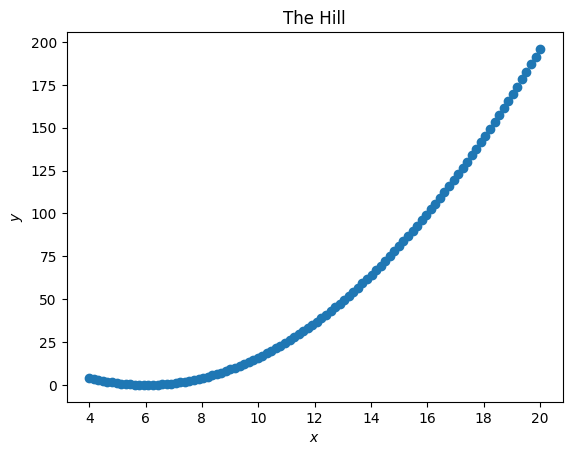

In [3]:
x = np.linspace(4, 20, 100)
y  = rolling_down_slope(x)

plt.scatter(x, y)
plt.xlabel("$x$")
plt.ylabel("$y$")

plt.title("The Hill")
plt.show()

Talk about what this is doing

# Finding the lowest point

An object with stop moving when the forces impacting it are all equal, so when gravity and the normal force are equal (in our frictionless, momentum-less digital world), the ball with stop rolling down the hill. 

To find where this point is, we want to find the lowest point of the hill. 
While it's easy to see it with our eyes, the ball doesn't know where it is, so it will just be moved by forces until it's not. 
Let's find where that is by taking a single step at a time for the ball.

## Step 1 - Calculate where the ball will be next time step

According to basic kinematics, you can calculate the position of an object by knowing its velocity and initial position, assuming constant acceleration (which we can in this case, no one is pushing the ball).  
We can define the initial position (we do get to put the ball down after all), but how do we determine how fast it's going?

Because do do have a handy dandy position generator, we can use the equation

$$
\displaystyle \Delta{v} = \frac{\Delta{y}}{\Delta{x}}
$$

to get the velocity and get the position from:   

$$
x_{i+1} = \Delta{v} * \gamma - x_{i} 
$$

$ \gamma $ is a stand-in for the acceleration here, but because we're in a fake digital world, we can pick whatever number we want. 

In ML, we typically refer to $ \gamma $ as the **Learning Rate**. 

In [4]:
x_0 = 15

x_test1 = x_0 + 0.001
x_test2 = x_0 - 0.001
delta_v = rolling_down_slope(x_test1) - rolling_down_slope(x_test2)
gamma = 0.1

x_1 = x_0 - (delta_v * gamma)


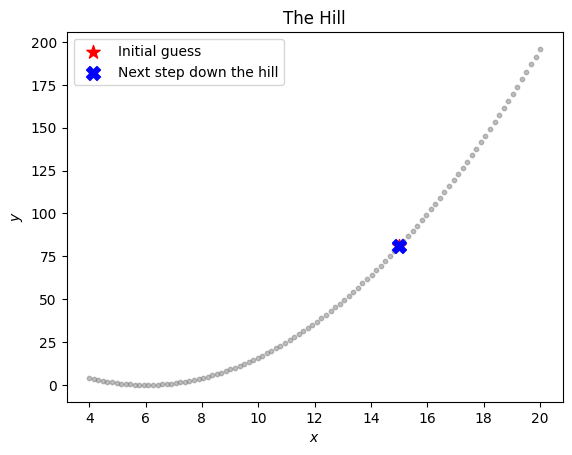

In [5]:
plt.scatter(x, y, alpha=0.5, color='grey', s=10)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("The Hill")

# Plot your initial guess, and the next step down the hill

plt.scatter(x_0, rolling_down_slope(x_0), color='red', marker="*", s=100, label='Initial guess')
plt.scatter(x_1, rolling_down_slope(x_1), color='blue', marker="X", s=100, label='Next step down the hill')

plt.legend()
plt.show()

## Step 2 - Move the ball to the minimum 

Step 1 is a good start, but we moved so little!! We need to keep moving down the hill!!
Let's keep trying to move down the hill for more than a few steps. 

In [6]:
def running_down_that_hill(x_init, gamma, N_steps):
    """
    Run down the hill using gradient descent
    """
    guesses = [x_init]
    for _ in range(N_steps):

        current_guess = guesses[-1]
        delta_v = rolling_down_slope(current_guess + 0.01) - rolling_down_slope(current_guess - 0.01)
        step_size = gamma * delta_v
        new_guess = current_guess - step_size
        guesses.append(new_guess)
    return np.array(guesses)

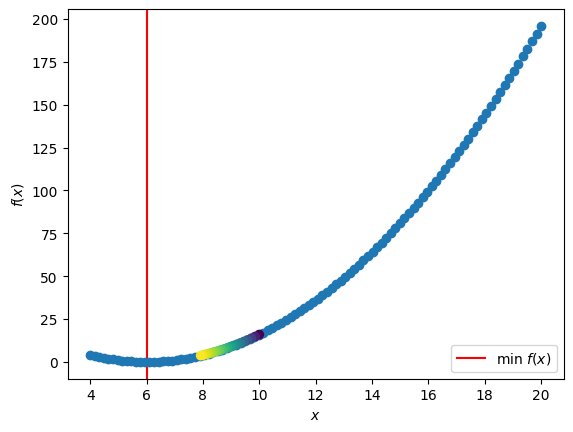

In [7]:
x_init = 10  # Pick an initial guess
gamma = 0.9 # Pick a learning rate
points = running_down_that_hill(x_init, gamma, N_steps=20)
y_points = rolling_down_slope(points)
xgrid = np.linspace(3, 100, 100)

plt.scatter(x, y)
plt.scatter(points, y_points, c=-y_points)
plt.axvline(6.0, zorder=-1, color="red", label="min $f(x)$")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.show()

# Oh no I dropped my marble down a N-Dimensional Plane!!

Oh dear oh goodness. 
I have been projected into a high dimensional space and then dropped my favorite marble! 
Where it it going to land??

In [8]:
def y_func(x_1, x_2, x_3, x_4): 
    "Function of 4D space"
    return x_1**2 + 2*x_2**2 + 4* x_3**2 + 6*x_4**2
x_1 = np.linspace(0, 20, 100)
x = [x_1, x_1, x_1, x_1]
y = y_func(x_1,x_1, x_1, x_1)

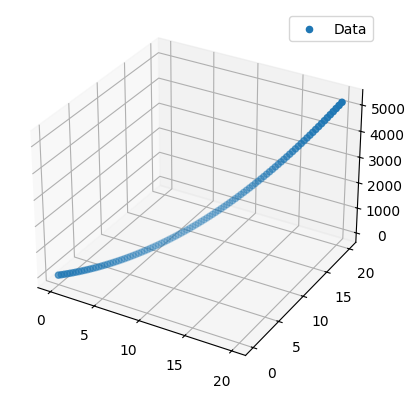

In [9]:
# Visualization of the space, projected into 3D. 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0], x[1], y, label="Data")

plt.legend()
plt.show()


## Group Activity - Find where the marble comes to rest 

For this activity, you will write code to find the minimum of this N-dimensional plane through approximated gradient descent. 

Steps: 

1. Write a function to increment the x space by a tiny amount
2. Find the slope by using the incremented space
3. Update the y position down the slope. 
4. Keep doing this until the difference between updated y positions reaches a specific threshold, or a number of steps is reached.

In [ ]:
def increment_x(): 
    ""

def calculate_velocity(): 
    ""

def iterate_y(intial_x_position, change_threshold, N_steps) -> tuple[list, list]: 
    """
    Write a function that will iterate through the 4D space, update x based on `increment_x`, and find the new y positions
    All of the x and ys should be stored in lists and returned
    """
    x_positions = []
    y_positions = []
    for i in range(N_steps):
        ...
    return x_positions, y_positions

In [ ]:
initial_x = np.array([1, 1, 1, 1])
x_history, y_history = iterate_y(initial_x, change_threshold=0.01, N_steps=100)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0], x[1], y, alpha=0.5, label="Data")

ax.scatter(x_history[0][0], x_history[1][0], y_history[0], c='red', label="Initial guess")
ax.scatter(x_history[0][-1], x_history[1][-1], y_history[-1], c='blue', label="Final guess")

plt.legend()
plt.show()

# What if I care about something other than hills and marbles? 

Let's generalize this into a problem that we can describe with a function. 
We know the hill is shaped like a parabola, but what if we don't know the coefficients? 
What if instead of a hill, it was a sum of sin functions describing natural phenomena in the world?  

For that, we don't care about how close how close we are to a minima of the function itself, but instead, how close we are to the true equations coefficients.

# Linear Regression

As the name implies, linear regression uses a linear function ($y=mx+b$) to fit data.
The trick is, all the parameters don't have to be 1D. 

Let's look at a 2D example.

In [48]:
def linear_model(x, m=None, b=None, with_noise=False):
    """2D Linear data with noise"""
    if m is None:
        m = np.array([0.5, 4])
    if b is None:
        b = 1
    y = (m[0] * x[0]) + (m[1] * x[1]) + b
    if with_noise:
        noise = np.random.default_rng(seed=42).normal(scale=4, size=x.shape[1])
        y += noise
    return y

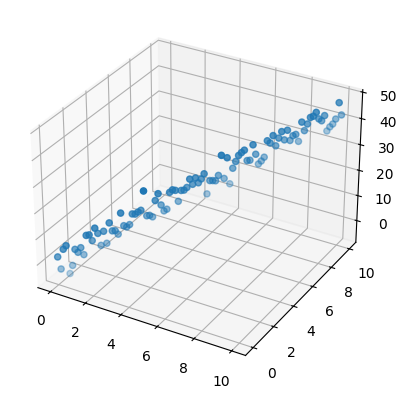

In [49]:
# Example data
x = np.array([np.linspace(0, 10, 100), np.linspace(0, 10, 100)])
y = linear_model(x, with_noise=True)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0], x[1], y)
plt.show()

Let's assume we don't know the actual parameters, so how do we evaluate how close we are to the solution? 

We can just evaluate the true value at a point, checking the true value ($y$) against the output of the model at point $x$ so $\hat{y} = f(x)$

There are many *many* different equations you can use to check this error, but one of the most common ones is **Mean Squared Error**

$$
L(y, \hat{y}) = \frac{\sum (y - \hat{y})^2}{|y|}
$$

We denote it with an $L$ for **loss** - the term for the difference between desired output of an ML model and the desired (true) results. 

In [50]:
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

## Step 1 - Take a guess at $m$ and $b$

For the above example, write your guesses for the value of $m$ and $b$, we'll use this to write a "fit". Afterwards, we can use this fit to make some predictions about future values of the line, and evaluate how good they are in comparison to our existing examples of the line! 

In [51]:
m_guess = [.4, 1]
b_guess = 5

y_pred = linear_model(x, m_guess, b_guess)

In [52]:
mse = mean_squared_error(y_true=y, y_pred=y_pred)
mse

210.07652081801277

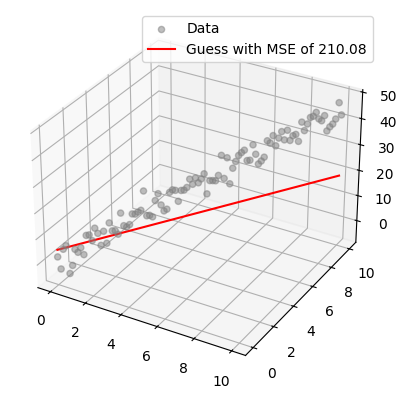

In [53]:
# Let's also do a visualization!

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[0], x[1], y, alpha=0.5, color='grey', label="Data")
ax.plot(x[0], x[1], y_pred, color='red', label=f'Guess with MSE of {round(mse, 2)}')

plt.legend()
plt.show()

# Step 2 - Using Gradient Descent

It stands to reason that just randomly guessing parameters is probably not the most effective way of finding the right guess. Can we do better? Absolutely! [Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent), and its family of related methods (you may have heard of [Adam](https://arxiv.org/abs/1412.6980)), can be used to find an optimal set of parameters for arbitrary models.

Given a function $f(x)$ and its derivative $\nabla f(x),$ the general rule of gradient descent is that to find a point closer to the actual minimum of $f,$ we follow its gradient:

$$x_{n+1} = x_n - \gamma \nabla f(x_n).$$

This looks **very** similar to the ball rolling down a hill for a reason. 
It's the exact same principal! 

The main difference is that now, instead of trying to find the minimum of the hill's slope (in other words, the difference between the bottom of the hill and the ball's position), we want to find the minimum of the difference between our *model* and the real data. 

To do that we have to combine two equations - the model equation $f(x)$ and the loss $L(y, \hat{y})$

$$

L(y, \hat{y}) = \frac{\sum (y - (\sum_{i=0}^{1}(m_i*x_i)+b))^2}{|y|}

$$

And then, our $\Delta{v}$ is changed into $\nabla{L(y, \hat{y})}$

Computing that $\nabla$ can be annoying, so generally we use packages to compute those gradients for us. (Here the whole equation is going to be out on display, but in the real world, you rarely do this by hand.)

### Side Note: Gradients and Derivative 

Confusingly, the words "gradients" ($\nabla f(x)$) and "derivative" ($\frac{df(x)}{dx}$) are used interchangably sometimes. For our single variable function, $f(x) = (x-2)^2$, they are the same. However, if we had a function of multiple variables (as we almost always do in ML/AI), this wouldn't be the case. For example, if we had a function $f(x,y,z) = x+y+z$, the derviative $\frac{df(x,y,z)}{dx}$ is only depending on $x$, so we wouldn't have derviative information about the other variables (y, z). We could very easily optimize a function to get to a minimum for x, but the other variables would be out in the cold. This is were the vector form of the derviative, the gradient comes in. The gradient takes the deriative of all these variables at once. 

So for our example $f(x,y,z) = x+y+z$, 

$$
\frac{df(x, y, z)}{dx} = 1+y+z 
$$ 
$$
\nabla f(x, y, z) = <\frac{df(x, y, z)}{dx}, \frac{df(x, y, z)}{dy}, \frac{df(x, y, z)}{dz}>
$$

In [80]:
def gradient_descent_linear_model(x:np.array, y:np.array, m0:np.array, b0:float, gamma:float=0.1, N:int=100):
    """
    Preform gradient descent for a 2D linear model
    """

    b = [b0]
    m = [m0]

    for _ in range(N):
        
        current_m = m[-1]
        current_b = b[-1]

        y_pred = linear_model(x, current_m, current_b)
    
        # Calculate the derivatives of the loss function at x and y, y_pred
        m_1_derivative = -2.0 / len(y_pred) * np.sum((y - y_pred) * x[0])
        m_2_derivative = -2.0 / len(y_pred) * np.sum((y - y_pred)) * x[1]  # Derivative w.r.t. m in dim 1 and 2

        b_derivative = -2.0 / len(y_pred) * np.sum(y - y_pred)
        
        new_m_guess =  [
            current_m[0] - gamma * m_1_derivative, 
            current_m[1] - gamma * m_2_derivative
                ]

        print(m_1_derivative)

        new_b_guess = current_b - gamma * b_derivative

        # Update
        m.append(new_m_guess) 
        b.append(new_b_guess)
        
        
    return m, b

$m$ and $b$ change as a function of the number of steps (or **epochs**). 

If we plot the convergence of `m` and `b` as a function of "epoch" (or number of full passes through the training data) we can see that the data very quickly settles on a final pair of parameters. 

In [81]:
m, b = gradient_descent_linear_model(x, y, m0=np.array([0.2, 6]), b0=8, gamma=0.01, N=10)
#m_1, m_2 = np.array(m)[:,0], np.array(m)[:,1]

188.7698662823012
-99.44926768292704
14.278090803804856
-31.91286173797182
-14.528485647771959
-22.469989913711007
-20.376233258152084
-22.31440100999085
-22.69045362217101
-23.7311234520359


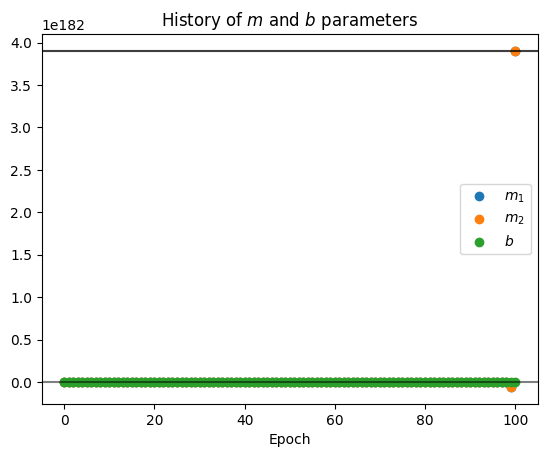

In [68]:
# Progress as a function of epoch

epochs = range(len(b))

plt.axhline(m_1[-1], color="black", alpha=0.5) # Final m value, x[-1] is the last value in the list x.  
plt.axhline(m_2[-1], color="black", alpha=0.5)
plt.axhline(b[-1], color="black", alpha=0.5)

plt.scatter(epochs, m_1, label="$m_1$")
plt.scatter(epochs, m_2, label="$m_2$")
plt.scatter(epochs, b, label="$b$")

plt.legend()
plt.xlabel("Epoch")
plt.title("History of $m$ and $b$ parameters")
plt.show()

We can also look at the linear fit itself at a few different steps. 

In [ ]:
# Show the different guesses overlayed onto data

epochs = [0, 5, 10, 20, 30, 60]
for epoch_check in epochs: 
    m_guess = [m_1[epoch_check], m_2[epoch_check]]
    b_guess = b[epoch_check]
    y_pred = linear_model(x, m_guess, b_guess)

    plt.plot(x, y_pred, label=f"Epoch {epoch_check}")

plt.scatter(x, y, label='True', alpha=0.5)
plt.xlabel("x")
plt.ylabel("f(x)=mx+b")
plt.title(f"Progress for finding f(x)={round(m_1[-1],2)}x_1+{round(m_2[-1],2)}x_2+{round(b[-1],2)}")
plt.legend()
plt.show()

This is pretty unwieldly way to look at our progress, so we can make something called "A Loss Curve". This gives one number for the whole model, so we have one point per epoch. 

Generally speaking, in ML we have a lot of parameters to track, so instead of storing every single model in our training process, we just keep track of this loss instead as a proxy for model performance. 

In [ ]:
loss_history = []
for m_1_guess, m_2_guess, b_guess in zip(m_1, m_2, b): 
    y_pred = linear_model(x, [m_1_guess, m_2_guess], b_guess)
    loss = mean_squared_error(y, y_pred)
    loss_history.append(loss)

epoch = range(len(loss_history))
plt.scatter(epoch, loss_history, alpha=0.5)

plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Loss History for f(x)=mx+b")
plt.show()

# Group Exercise - Fit an arbitrary Function

Instead of just finding a minimum of a single point function, we can also find a match for a function. 
This is useful for modeling behavior of a dataset, like if you have a dataset and want know the value of an input not contained directly in the data. 

For the example below, lets pretend we are trying to find out the tone of a sound wave we measured at a couple of points. 

For this, we will use the base equation $ y(t) = A sin(2\pi(ft + \phi)) $, so the variables to fit are $A, f, \phi $ 

## Steps: 

1. Write a function (loss) that will evaluate how close your guess of parameters is to the data
2. Write a function that will iteratively update your parameter guess 
    * Pick input parameters for the function that include how many epochs, learning rate, and initial value guess
    * Use the defined gradient functions to calculate the update of each variable
    * Return the final variables and the loss at each step
3. Plot the loss against the number of guesses made
4. Plot the final function against the input data

In [22]:
def generate_data(N_points, noise=0.1):
    """
    Generate data for a sine wave with added noise
    """
    x = np.random.default_rng().random(N_points)*5
    base_points = 2 * np.sin(3.2 * x + 1.4)
    y = base_points + noise * np.random.randn(N_points)
    return x, y

def fitting_function(a, f, phi, x): 
    return a * np.sin(2*np.pi*(f * x + phi))

Text(0.5, 1.0, 'Collected Pitch Data')

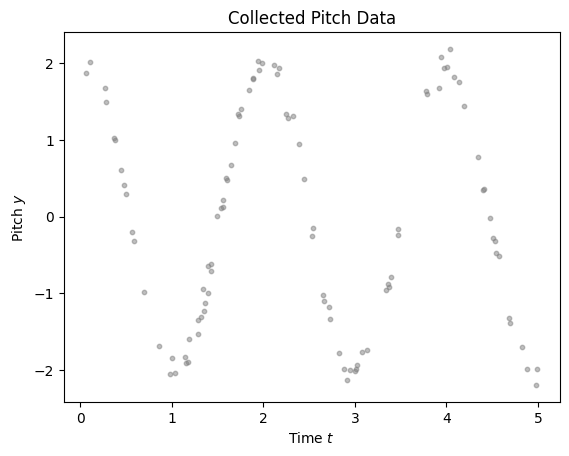

In [23]:
x, y = generate_data(100)

plt.scatter(x, y, alpha=0.5, color='grey', s=10)
plt.xlabel("Time $t$")
plt.ylabel("Pitch $y$")
plt.title("Collected Pitch Data")

In [ ]:
def gradient(a, f, phi, x):
    """
    Computes the gradient of the function at a, f, phi using tf.GradientTape
    
    This is a helper function so you don't need to compute the gradient manually

    Returns the gradient of a, f, phi.
    """

    a = tf.Variable(a, dtype=tf.float32)
    f = tf.Variable(f, dtype=tf.float32)
    phi = tf.Variable(phi, dtype=tf.float32)
    x = tf.constant(x, dtype=tf.float32)

    with tf.GradientTape() as tape:
        y_pred = fitting_function(a, f, phi, x)
        
    grad = tape.gradient(y_pred, [a, f, phi])
    return grad[0], grad[1], grad[2]
    

def loss_function(values="????"):
    """Write a loss function to be used for fitting your function to the data"""
    loss = "??"
    return loss

def optimize_loss(x, y, n_epochs):
    """Write a function that optimizes the loss function, and returns the best fit parameters"""
    
    a = "??"
    f = "??"
    phi = "??"


    loss = []

    return loss, a, f, phi

In [ ]:
def plot_loss(loss): 
    "Plot how the loss changes over time"

def plot_best_fit(values): 
    "Plot the best fit function, compared to the input data"

In [ ]:
loss, a_best, f_best, phi_best = optimize_loss(x, y, n_epochs=1000)
plot_loss(loss)
plot_best_fit("???")

# Classification

Until now, we have assumed that when you give an input, you get an output number. 
This is very useful, but not always what we want. 
Let's imagine you accidentally erased all your contacts and are now getting cling texts from your ex.
You could have a number of parameters about the text - how many characters it is, when it was sent, how many times they had texted before, etc. 

You want to make sure you never get texts from them, but texts from every else. 
In this case, you want to put the texts you get into 2 groups - ones you want to read and ones you don't. 

This is a `classification` problem - putting the input data into defined groups. 

There are many sort of algorithms to deal with this sort of data, but we'll start with the one most like `linear regression`. 

# Logistic Regression 

Logistic regression is a slight modification of linear regression that allows for categorical targets. There are multiple types of logistic regression, but for this tutorial, we will focus on _binary_ logistic regression: when the target value can be "on or off": 0 or 1.

Ignore that the name calls it a "regression" technique, this is classification. 

Consider the previous linear regression model of a single variable: $f(x) = mx + b$. The range, or set of possible values, that $f(x)$ can take on is infinite: $f(x) \in (-\infty, \infty).$ This is appropriate, in general, for regression problems in which the output can take on any value, but in binary classification problems, we want the model to essentially represent the probability of being one of the two classes.

So, for logistic regression, we add an extra step:

$$g(x) = \sigma(f(x))$$

where 

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

is called the _sigmoid function_. The sigmoid function has the property of being bounded between 0 and 1, making it a convenient choice for our purposes.

In [24]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/kk/32866m297zgfpb2797992xy80000gq/T/ipykernel_6849/1276627546.py:4: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel("$\sigma(x)$")
/var/folders/kk/32866m297zgfpb2797992xy80000gq/T/ipykernel_6849/1276627546.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.title("$\sigma(x) = 1/{1 + e^{-x}}$")


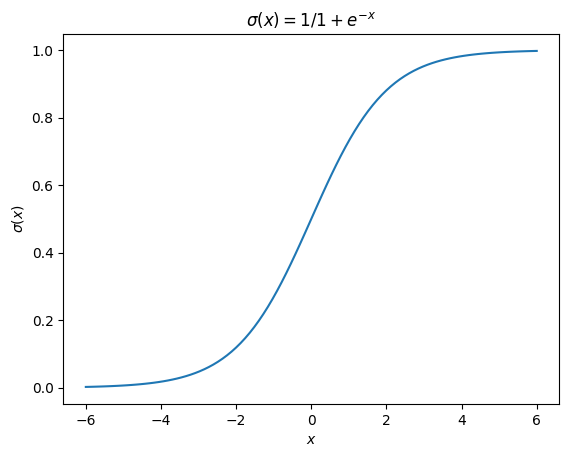

In [25]:
grid = np.linspace(-6, 6, 100)
plt.plot(grid, sigmoid(grid))
plt.xlabel("$x$")
plt.ylabel("$\sigma(x)$")
plt.title("$\sigma(x) = 1/{1 + e^{-x}}$")
plt.show()

#  Assigning Loss and making the model

For this model, we are going to use a new loss function. 
This function, called **cross-entropy loss** counts the number of correct classifications (0 or 1) vs the incorrect classifications. 

$$J(\hat{y}, y) = -y \ln \hat{y} - (1-y) \ln (1-\hat{y}),$$

and the total loss over the dataset:

$$L(g(\vec{x}), y) = \frac{1}{N} \sum_{i=1}^N J(g(x_i), y_i).$$

We will also be using a package to make this model instead of writing it by hand - [sklearn](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)

The package is by default installed in google-collab, so do not worry about the terror that is python package management. 

In [ ]:
# Import SKLearn modules
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


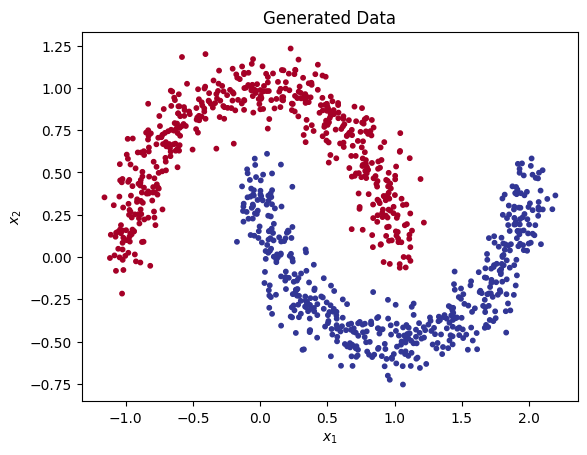

In [49]:
def generate_data(n_points):
    """
    Generate data for a 2D binary classification problem
    """
    x, y = make_moons(n_points, noise=0.1)
    return x, y

x, y = generate_data(1000)

plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu, s=10)
plt.xlabel("$x_1$") 
plt.ylabel("$x_2$")
plt.title("Generated Data")
plt.show()

## Using the model 

You may look at the sigmoid function and the data and think. 
"Wow there's no way you can map that sigmoid point to this data!" 
And you'd be correct. 
This is an example of non-linear data being fit with a linear function, which is sub-optimal. 
It is always a good idea to pick a model that has the appropriate amount of expressiveness to capture the data.
But, for the sake of this exercise, let's see how well we do otherwise. 

Before we start training, we will be pulling aside some data to test the results of the training. 
If we did not do this, it is possible that the data we test on would be directly used to optimize the model, letting it cheat.

<>:34: SyntaxWarning: invalid escape sequence '\s'
<>:34: SyntaxWarning: invalid escape sequence '\s'
/var/folders/kk/32866m297zgfpb2797992xy80000gq/T/ipykernel_6849/2825508598.py:34: SyntaxWarning: invalid escape sequence '\s'
  plt.title(f"Sigmoid Curve,  $\sigma(x)$ = 1.0 / (1.0 + e^-({eq})")


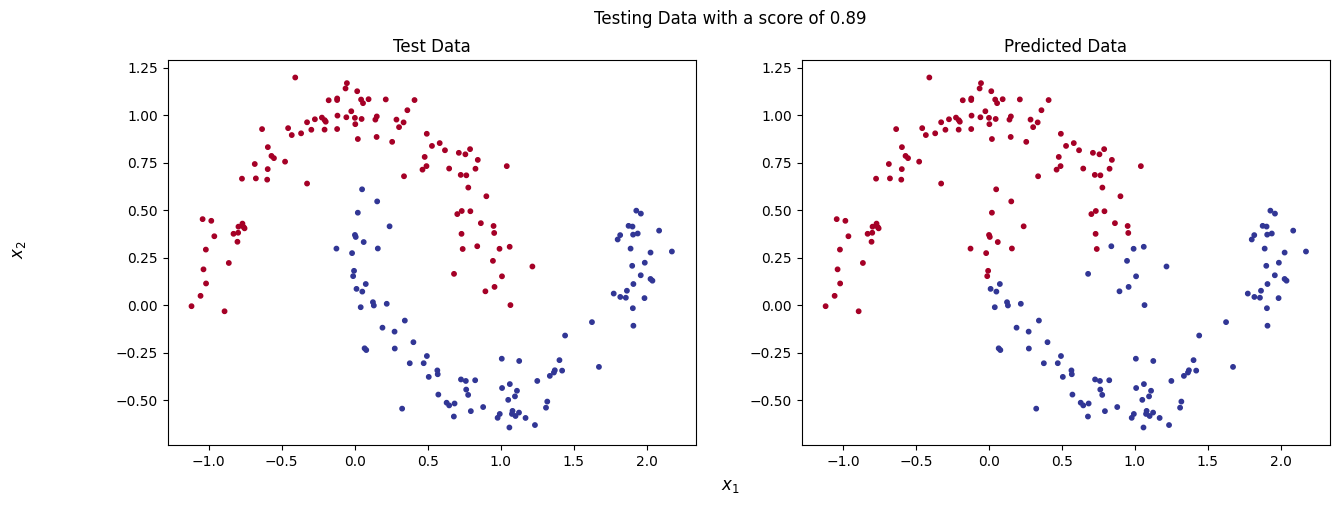

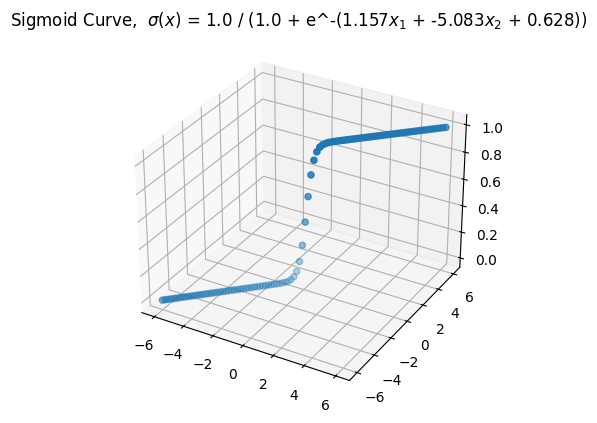

In [91]:
# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = LogisticRegression()
model.fit(x_train, y_train)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].scatter(x_test[:, 0], x_test[:, 1], c=y_test, cmap=plt.cm.RdYlBu, s=10)
ax[0].set_title("Test Data")

ax[1].scatter(x_test[:, 0], x_test[:, 1], c=model.predict(x_test), cmap=plt.cm.RdYlBu, s=10)
ax[1].set_title("Predicted Data")

fig.supxlabel("$x_1$")
fig.supylabel("$x_2$")
fig.suptitle(f"Testing Data with a score of {model.score(x_test, y_test)}")

plt.show()


# Then lets look at this on a sigmoid curve

coeff = model.coef_[0]
intercept = model.intercept_[0]

vis_x = np.array([np.linspace(-6, 6, 100), np.linspace(-6, 6, 100)])
vix_y = 1.0 / (1.0 + np.exp(-coeff[0]*vis_x[0] + coeff[1]* vis_x[1] + intercept))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(vis_x[0], vis_x[1], vix_y)
eq = f"{round(coeff[0], 3)}$x_1$ + {round(coeff[1], 3)}$x_2$ + {round(intercept, 3)})"
plt.title(f"Sigmoid Curve,  $\sigma(x)$ = 1.0 / (1.0 + e^-({eq})")
plt.show()


# Group Exercise - Fit Clusters of Particle Hits

Congratulations!
You have been hired at CERN to identify particle collisions that contain a Higgs Boson event vs. those that do not!
This is a big honor, but you show up at your first day of work to see that you have been assigned way more events to comb through than you can do by hand. 
So, you have decided to write a classification algorithm to do your work instead. 

For this exercise you will use a logistic regression algorithm to pick out what events are Higgs events and which are not. 


(
    Note: For the more physics-literate among you, you will notice this dataset is not very accurate to life. 
    This dataset is constructed to show *balanced* distributions of higgs vs non-higgs events, which is very different form how actual events show up in detectors. 
    The actual ratio is so so so so much more smaller than 50/50, with even the more common channels [the ways different particles are produced] at energies most likely to produce a higgs, a higgs event shows up less than 10% of the time. 
    For the sake of this exercise, let's just pretend there was a **_very_** skilled grad student working on this before you.
)

For this exercise you will: 

1. Process data into label and input data
2. Use an existing package to produce a model
    * Define a loss function
    * Define a model
4. Test the model on a reserved subset of data
5. Show your results on a 2d plot, showing the line of used to differentiate your two datasets. 

Text(0.5, 1.0, 'Generated Data')

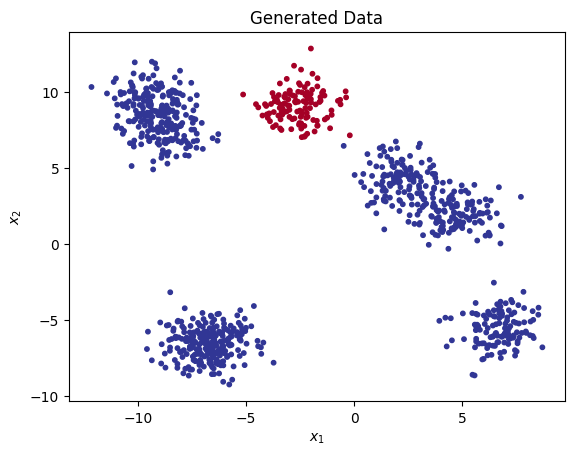

In [43]:
from sklearn.datasets import make_blobs
def generate_data(N_points): 
    x, y = make_blobs(n_samples=N_points, centers=8, random_state=42)
    y[y != 0] = 1
    return x, y

x, y = generate_data(1000)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdYlBu, s=10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Generated Data")


In [ ]:
def separate_data(x, y):
    """
    Separate the data into training and test sets
    """
    ...

def train_model(x_train, y_train):
    """
    
    """
    ...



def test_model(x_test, y_test):
    """
    """
    ...


def plot_results():
    ""
    ...


something = separate_data(x, y)
train_model(something)
test_model(something)
plot_results()

# Backup Material

## Polynominal Fits, Underfitting, and Overfitting

This sample principals for optimization can be applied to anything you can take a derivative of. (This includes complicated neural network architectures! Basically all ML is just increasing complicated linear algebra!)

So instead of fitting a simple line of data, let's try a more complicated data structure, so we can optimize a polynominal to fit. 

In [ ]:
from numpy import poly


rng = np.random.default_rng(seed=42)

n_coeff = rng.integers(4,9) # Anywhere between 4 and 9 polynominal coefficents
poly_coefficents = [rng.random() for _ in range(n_coeff)]
polynominal = poly.polynomial.Polynomial(poly_coefficents) # Random coefficents, we don't know what the polynominal we're fitting is (unless we look ;))
x, y = polynominal.linspace(n=100, domain=[-5, 5])

y += rng.uniform(-3, 3, 100)

plt.scatter(x,y)

### Guess a number of parameters, and optimize

`Np.Polynominal` has a least square fit included, so we can use this a shortcut instead of writing a whole new gradient descent method. Though, remember, as long as you _can_ take a derivative, you can try to optimize this model via gradient descent! 

In [ ]:
# coefficent guess

# This looks almost like a parabola, so let's try a 2nd degree polynominal for a fit 
degree_of_fit = 2
new_model = poly.polynomial.Polynomial([1 for _ in range(degree_of_fit+1)]) # You can play around with these to try and get a good initial fit! 
model_fit = new_model.fit(x, y, deg=2)
x_fit, y_fit = model_fit.linspace(n=100, domain=[-5, 5]) # Get points over the same space, see the loss! 

mean_squared_error(y, y_fit)

In [ ]:
plt.scatter(x, y, alpha=0.4, label='True')
plt.scatter(x_fit, y_fit, label='Fit')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Fit y={model_fit}")
plt.show()

This isn't a bad fit, strictly speaking, but it's not great. We can probably call this model `underfit` (as we have more complexity in the data than the model predicts.) Look at how the tail of the model, (around x=-4) behaves as compared to the data - there is a mis-match. 

Model underfitting can be caused by many things but the two that are easiest to correct are:

* Model does not have enough parameters to fit the data 

If your model is too simple for your data, it'll be hard to show good results. Imagine trying to draw a line of best fit through a sine function - you'll never get perfectly accurate results. 

* Model hasn't been trained long enough. 

This is like if we stopped training the linear model at epoch 10. There is still a lot of extra work the model can do, it hasn't converged on a solution. This can be tricker to see when you get more complicated data and more complicated models, but keeping a second set (called a `validation` set) which is only used for testing can help. When the training data doesn't improve beyond the validation data, that indicates there may be a problem. 


In the above example, we know for a fact the model is unfit with too few parameters, as we tried to fit a polynominal that is at least degree 4 with a degree 2 model. Let's try again with a more complicated model. 

In [ ]:
degree_of_fit = 16
new_model = poly.polynomial.Polynomial([1 for _ in range(degree_of_fit+1)])
model_fit = new_model.fit(x, y, deg=degree_of_fit)
x_fit, y_fit = model_fit.linspace(n=100, domain=[-5, 5])

mean_squared_error(y, y_fit)

In [ ]:
plt.scatter(x, y, alpha=0.4, label='True')
plt.scatter(x_fit, y_fit, label='Fit')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title(f"Fit y={model_fit}")
plt.show()

Wow! Loss here is a lot better. 

We have a different problem here though, one's that a bit more subtle. It's easier to see this when we check the truth value of the source polynominal against our predictions. 

In [ ]:
_, y_true = polynominal.linspace(n=100, domain=[-5, 5])
x, y_pred = model_fit.linspace(n=100, domain=[-5, 5])

plt.scatter(x, y_true, label="True", alpha=0.6)
plt.scatter(x, y_pred, label="Prediction", alpha=0.6)

plt.title(f"Fit with MSE of {round(mean_squared_error(y_true, y_pred), 2)}")
plt.legend() 
plt.show() 

# If our model was truly good, it would be a nearly perfect fit when noise is removed. Instead, we fit to the noise. 

In [ ]:
# Challenge: Make the nearly perfect model 

degree_of_fit = "?"

new_model = poly.polynomial.Polynomial([1 for _ in range(degree_of_fit+1)])
new_model = new_model.fit(x, y, deg=degree_of_fit)
x_fit, y_fit = new_model.linspace(n=100, domain=[-5, 5])

In [ ]:
_, y_true = polynominal.linspace(n=100, domain=[-5, 5])

plt.scatter(x, y_true, label="True", alpha=0.6)
plt.scatter(x, y_fit, label="Prediction", alpha=0.6)

plt.title(f"Fit with MSE of {round(mean_squared_error(y_true, y_fit), 2)}")
plt.legend() 
plt.show() 

### New dataset - Kinematics! 

Let's imagine a strange situation. 

Suppose you are at NASA mission control, and you have astronauts on Mars and the Moon at the same time. How incredible! To make sure your instruments are calibrated correctly, you asked your astronauts to load a few baseballs in their space travel sized pitching machine, and track them as a function of time, sending the results back to you. They include the velocity and position as a function of time for you to make sure your instruments are calculating gravity correctly. 

 Unfortunately, you now have two signals being sent back from both astral bodies, but you forgot tell them what channels to use! You now have to write an algorithm to differentiate the two. You know you can do it, but you made a bet with your colleague that you could do it without using physics equations. This may be silly on your part, but you're fairly certain it'll work out.

 But just in case it doesn't, your colleague already has the answers.

In [ ]:
rng = np.random.default_rng(seed=42)

def kinematics(time, gravity): 
    init_throw_velo = ((25-10) * rng.random() + 10) * np.sin(np.pi/4)
    position = init_throw_velo * time  - 0.5 * gravity * time**2
    velocity = init_throw_velo**2 - 2*gravity*position
    return position, velocity

def moon_call(time): 
    gravity = 1.625
    position, velocity = kinematics(time, gravity)
    return np.array([time, position, velocity])

def mars_call(time): 
    gravity = 3.721
    position, velocity = kinematics(time, gravity)
    return np.array([time, position, velocity])

def space_signal(N_pings=3600): 
    signal = np.array([0,0,0])
    source = np.array([])
    for _ in range(N_pings): 
        time = 5 * rng.random() # between 0 and 5 seconds
        signal_source = 0 if rng.random()<0.5 else 1
        if signal_source == 0:
            new_signal = moon_call(time)
        else: 
            new_signal = mars_call(time)
        
        signal = np.vstack([signal, new_signal])
        source = np.concatenate([source, np.array([signal_source])])
    signal = signal[1:,]
    return signal, source

In [ ]:
signal, source = space_signal() 
# What we want to predict is if each sample was taken on the moon or on mars, 
#so the labels here is the location it was sent from (source=(0,1)), and the signal is the time, position, velocity tuple

In [ ]:
## Quick visualization
fig, subplots = plt.subplots(1, 2, figsize=(10,6))

subplots[0].scatter(signal[:,0], signal[:,1])
subplots[0].set_ylabel("Position (m)")

subplots[1].scatter(signal[:,0], signal[:,2])
subplots[1].set_ylabel("Velocity (m/s)")

fig.suptitle("Space Kinematics")
fig.supxlabel("Time (s)")
plt.show()

### Scaling

If you look at those plots above, those are pretty different scales for each of the variables. Because of this, the model will struggle to optimize the variables - putting more weight on the bigger variables and less weight on the smaller variables, when there is a lot more complexity there. 

We can use scikit-learn's [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this - as we only have to do it once, and then can use the scaler for other predictions down the road. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler().fit(signal)

signal_norm = scaler.transform(signal)

print(signal_norm.shape)
fig, subplots = plt.subplots(1, 2, figsize=(10,6))

subplots[0].scatter(signal_norm[:,0], signal_norm[:,1])
subplots[0].set_ylabel("Position (m)")

subplots[1].scatter(signal_norm[:,0], signal_norm[:,2])
subplots[1].set_ylabel("Velocity (m/s)")

fig.suptitle("Space Kinematics")
fig.supxlabel("Time (s)")
plt.show()

# The distribution looks the same, but now everyhting is between 0 and 1 :] 

### Writing the model 

Because our problem has 3 different independent variables, we need to make a model that accounts for that. 

Like our linear model, we need to have adjustable coefficients ($m, b$) that change the prediction after reach step of gradient descent. Let's use the linear model as a basis, but just accounting for 3 different dimensions. 

$f(\vec{x}) = c_1x_1 + c_2x_2 + c_3x_3$

We then can combine this multidimensional linear equation with our sigmoid function, like we did above. 

$$g(\vec{x}) = \sigma(f(\vec{x})) = \sigma(c_1x_1 + c_2x_2 + c_3x_3) =  \frac{1}{1 + e^{-(c_1x_1 + c_2x_2 + c_3x_3)}}$$


In [ ]:
def logisitic_model(x, c:np.array): 
    n_dimensions = x.shape[1]
    exponent = np.sum(np.array([x[:,i]*c[i] for i in range(n_dimensions)]), axis=0)
    return 1.0 / (1.0 + np.e**(-(exponent)))

While you certainly can use the mean squared error criterion from before, there is actually a better choice: it's called the _cross-entropy loss function_. It turns out that for logistic regression, the cross entropy loss is _convex_, meaning we are guaranteed to converge to the global minimum and find the absolute best fit of our model. The cross entropy loss is given by:

$$J(\hat{y}, y) = -y \ln \hat{y} - (1-y) \ln (1-\hat{y}),$$

and the total loss over the dataset:

$$L(g(\vec{x}), y) = \frac{1}{N} \sum_{i=1}^N J(g(x_i), y_i).$$

In [ ]:
# Apply this loss to a sigmoid output 
def cross_entry_loss(y, y_hat):
    loss = -y*np.log2(y_hat) - (1-y)*np.log2(1-y_hat)
    return loss

# Let's see what happens when you have different x/y_true combos
y_prediction = "?"
assert cross_entry_loss("?", y_prediction) == 0 
assert cross_entry_loss("?", y_prediction) == 1

### Write the optimization loop
In order to optimize the model, we need to take the gradient of the loss criteron, $L(g(\vec{x}), y)$, that we defined above.

The deriative here is a little tricky, but we can calculate it with the chain rule. The proof here is beyond the scope of this notebook, but know that our deriative ends up being: 

$$ \frac{\delta}{\delta c_i} = \frac{1}{N} \sum_{i=1}^N (x_i * (\sigma_c(x_i))-y_i)$$

([You can find a derivation on this stack post](https://math.stackexchange.com/a/3540617))

In [ ]:
def f_prime(x, y, c_i): 
    # TODO Notate
    y_pred = logisitic_model(x, c_i)
    return np.array([1/x.shape[1]*np.sum(x[:,i]*(y_pred - y), axis=0) for i in range(len(c_i))])

def gradient_descent(x:np.array, y:np.array, c:np.array, f_prime:callable, gamma:float=0.01, N:int=100):
    loss_history = []
    for _ in range(N): 
        y_pred = logisitic_model(x, c) # How do we get the prediction? 

        # What is the loss we're optimizing?
        loss = cross_entry_loss(y, y_pred)
        loss_history.append(loss.mean())

        # Calculate the derivatives of the loss function at x and y, y_pred 
        gradient = f_prime(x, y, c)
        c =  c - gamma * gradient # Because we are keeping track of the loss history, it's fine to overwrite the coefficents

    return c, loss_history


In [ ]:
c_init = np.array([0.5,0.5,0.5])
model_coeff, loss_history = gradient_descent(
    x=signal_norm, y=source, c=c_init, f_prime=f_prime
)

In [ ]:
# Plot the loss
epochs = range(len(loss_history)) # range(len(x)) is a shortcut to get a set integers from 0 to N, where N is the number of elements in x. 
plt.scatter(epochs, loss_history)

# Like good scientists, we always give our plots labels 
plt.xlabel("epochs")
plt.ylabel("Cross Entropy Loss")
plt.title("Loss History")

plt.show()

In [ ]:
## Make some predictions 
new_signal, new_source_true = space_signal(N_pings=20)
y_prediction = logisitic_model(new_signal, model_coeff)
y_prediction

Well, this doesn't look quite right. It is important that we remember that we made a pre-processing step - This isn't included in the `logistic_model` function, so we need to apply it to our new test set. 

In [ ]:
new_signal_norm = scaler.transform(new_signal)
y_prediction = logisitic_model(new_signal_norm, model_coeff)
y_prediction # Much more reasonable values. 

In [ ]:
cross_entry_loss(new_signal_norm, y_prediction).mean() # Just higher than our training loss, not bad! 

### Out of Distribution data

Oh goodness! We just got another signal! Someone must have lost track of the astronauts on mission. This signal though, it looks....very different. You compared the timestamp on the message and the time you received it, and determined it had to be sent from over 5 AU away! It had to be sent from Jupiter, which is quite a feat for a pre-light travel civilization such as your own. 

For giggles, instead of reporting this incredible scientific discovery, you put in your newly trained classification algorithm. 


In [ ]:
def jupiter_kinemantics(time): 
    gravity = 24.79 
    position, velocity = kinematics(time, gravity)
    return np.array([time, position, velocity])

def jupiter_signal(N_pings=100): 
    signal = np.array([0,0,0])
    for _ in range(N_pings): 
        time = 5 * rng.random()
        new_signal = jupiter_kinemantics(time)
        
        signal = np.vstack([signal, new_signal])
    signal = signal[1:,]
    return signal

In [ ]:
signal = jupiter_signal()

# We scale it the same as we did before 
scaled_signal = scaler.transform(signal)

#Predict the class? 
y_prediction = logisitic_model(scaled_signal, model_coeff)

plt.title("Jupiter Predictions")
plt.hist(y_prediction)
plt.show()

Now this is strange, instead of clearly being one class or the other, it's a bizarre mix of both with no rhyme or reason! 

This is because this data is what we call "Out of Distribution" - it is vastly different than the original data we trained our model to recognize. 
It's an exaggerated effect of what we saw with the testing data. The input is different than what was given, so the model isn't ready to handle it. We could re-train the model including the new Jupiter signal and see more logical performance, but as the model is now, it is not designed. 

In machine learning, specifying what inputs are in and out of distribution is very important. It can help in ensuring your model is accurate when used.